In [1]:
import pandas as pd

In [2]:
messages = pd.read_csv(r'G:\DATASCIENCE\ds_projects\01NLP\SpamClassifier-master\spamclassifier\SMSSpamCollection',
sep='\t', names=["label", "message"])

In [3]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


C:\Users\welcome\envs\flas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

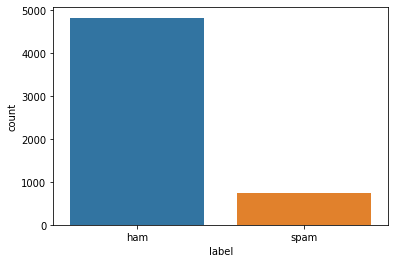

In [4]:
import seaborn as sns

sns.countplot('label', data=messages)

In [5]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
messages.iloc[0]

label                                                    ham
message    Go until jurong point, crazy.. Available only ...
Name: 0, dtype: object

In [7]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
#Data cleaning and preprocessing
import re
import nltk


In [6]:
#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download(['wordnet','stopwords'] )

  
#ps = PorterStemmer()
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-A]',' ', messages['message'][i])
    review=review.lower()
    review=review.split()

    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [8]:
corpus[:10]

['jurong point crazy available bugis n great world la e buffet ine got amore wat',
 'k lar oking wif u oni',
 'ree entry wkly comp win final tkts st ay ext receive entry question std txt rate apply',
 'dun say early hor c already say',
 'ah think go usf life around though',
 'ree sg ey darling week word back like fun still b ok x std chgs send rcv',
 'ven brother like speak hey treat like aid patent',
 'per request elle elle ru innaminunginte urungu ettam set callertune allers res copy friend allertune',
 'valued network customer selected receivea prize reward claim call laim code alid hour',
 'ad mobile month entitled pdate latest colour mobile camera ree obile pdate']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer(max_features=2500)
#X = cv.fit_transform(corpus).toarray()

tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [10]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y=pd.get_dummies(messages['label'])


In [12]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [13]:
y=y.iloc[:,1].values

In [14]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [15]:
# Train Test Split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [17]:
y_pred=spam_detect_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.97847533632287

In [19]:
confusion_matrix(y_pred, y_test)

array([[954,  23],
       [  1, 137]], dtype=int64)

In [20]:
for i in range(20):
    print("expected : ", y_test[i], "output : ", y_pred[i])

expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0
expected :  1 output :  1
expected :  0 output :  0
expected :  0 output :  0
expected :  0 output :  0


In [26]:
import pickle

pickle.dump(spam_detect_model, open("spam_model.pkl", "wb") )

In [22]:
import pickle

pickle.dump(tv, open("tfidf.pkl", "wb"))